In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('smartphone_cleaned.csv')

In [250]:
# code to convert all column's values to lower case

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.lower()

pd.set_option('display.max_columns', None)


In [251]:


# 'dim_1',
# 'dim_2', 
# 'total_pixels', 
#  'extended_mem_availaible',   
# Extra columns should be removed
df.columns

Index(['index', 'brand', 'model', 'rating', 'has_5g', 'has_NFC',
       'has_IR_Blaster', 'processor_brand', 'processor_name',
       'processor_cores', 'processor_speed', 'processor_speed_cat', 'ram_size',
       'storage', 'battery_capacity', 'fast_charging_available',
       'fast_charge_cap', 'display_size', 'dim_1', 'dim_2', 'refresh_rate',
       'total_pixels', 'resolution', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front', 'os',
       'extended_mem_availaible', 'extended_memory_upto', 'price'],
      dtype='object')

# Univariate Analysis

### Brand

#### Categorical

**Conclusion**

- nothing unusual

In [252]:
df.brand.value_counts().head()

brand
xiaomi     134
samsung    132
vivo       111
realme      97
oppo        88
Name: count, dtype: int64

<Axes: ylabel='count'>

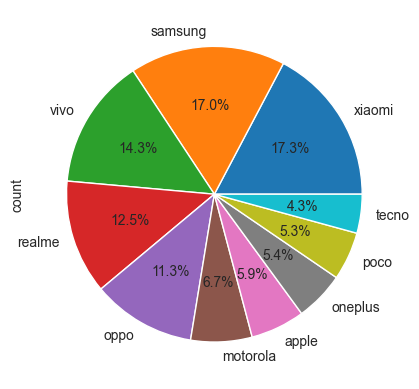

In [253]:
df.brand.value_counts().head(10).plot(kind='pie', autopct='%1.1f%%') # out of all phone maximum is offered by xiomi and samsung

<Axes: xlabel='brand'>

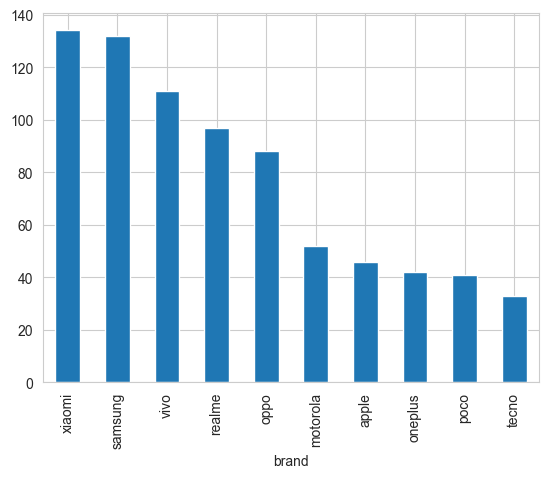

In [254]:
df.brand.value_counts().head(10).plot(kind='bar')

In [255]:
df.model.isnull().sum()

0

In [256]:
df


,index,brand,model,rating,has_5g,has_NFC,has_IR_Blaster,processor_brand,processor_name,processor_cores,processor_speed,processor_speed_cat,ram_size,storage,battery_capacity,fast_charging_available,fast_charge_cap,display_size,dim_1,dim_2,refresh_rate,total_pixels,resolution,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_mem_availaible,extended_memory_upto,price
0,2,oneplus,oneplus 11 5g,89.0,True,True,False,qualcomm,snapdragon 8 gen2,8.0,3.20,high range,12,256,5000.0,1.0,100.0,6.70,1440,3216,120.0,4631040,1440 x 3216,3,1.0,50.0,16.0,android,0,NaN,54999.0
1,3,oneplus,oneplus nord ce 2 lite 5g,81.0,True,False,False,qualcomm,snapdragon 695,8.0,2.20,mid range,6,128,5000.0,1.0,33.0,6.59,1080,2412,120.0,2604960,1080 x 2412,3,1.0,64.0,16.0,android,1,1000.0,19989.0
2,4,samsung,samsung galaxy a14 5g,75.0,True,False,False,samsung,exynos 1330,8.0,2.40,mid range,4,64,5000.0,1.0,15.0,6.60,1080,2408,90.0,2600640,1080 x 2408,3,1.0,50.0,13.0,android,1,1000.0,16499.0
3,5,motorola,motorola moto g62 5g,81.0,True,False,False,qualcomm,snapdragon 695,8.0,2.20,mid range,6,128,5000.0,NaN,NaN,6.55,1080,2400,120.0,2592000,1080 x 2400,3,1.0,50.0,16.0,android,1,1000.0,14999.0
4,6,realme,realme 10 pro plus,82.0,True,False,False,mediatek,dimensity 1080,8.0,2.60,high range,6,128,5000.0,1.0,67.0,6.70,1080,2412,120.0,2604960,1080 x 2412,3,1.0,108.0,16.0,android,0,NaN,24999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1017,motorola,motorola moto edge s30 pro,83.0,True,False,False,qualcomm,snapdragon 8 gen1,8.0,3.00,high range,8,128,5000.0,1.0,68.0,6.67,1080,2460,120.0,2656800,1080 x 2460,3,1.0,64.0,16.0,android,0,NaN,34990.0
976,1018,honor,honor x8 5g,75.0,True,False,False,qualcomm,snapdragon 480+,8.0,2.20,mid range,6,128,5000.0,1.0,22.0,6.50,720,1600,NaN,1152000,720 x 1600,3,1.0,48.0,8.0,android,1,1000.0,14990.0
977,1019,poco,poco x4 gt 5g (8gb ram + 256gb),85.0,True,True,True,mediatek,dimensity 8100,8.0,2.85,high range,8,256,5080.0,1.0,67.0,6.60,1080,2460,144.0,2656800,1080 x 2460,3,1.0,64.0,16.0,android,0,NaN,28990.0
978,1020,motorola,motorola moto g91 5g,80.0,True,True,False,qualcomm,snapdragon 695,8.0,2.20,mid range,6,128,5000.0,NaN,NaN,6.80,1080,2400,NaN,2592000,1080 x 2400,3,1.0,108.0,32.0,android,1,1000.0,19990.0


### Model

#### Supporting col

**Conclusion**

- 980 unique models
- can't say this is a categorical col, because all the values are unique

In [257]:
df.model.nunique() 

980

### Price

#### Numerical

**Conclusion**

- price col is highly skewed 
- there are lot of outliers


In [258]:
df.price.describe() 

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

<Axes: >

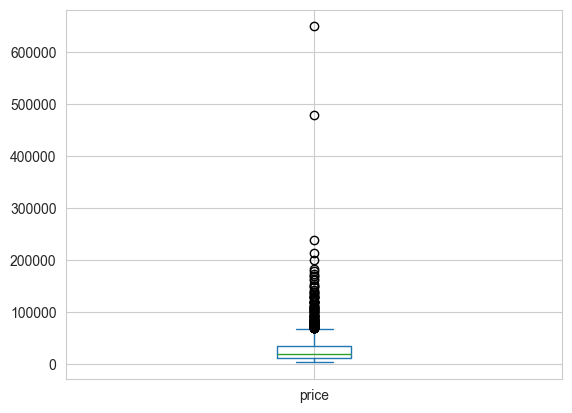

In [259]:
df.price.plot(kind='box')

In [260]:
df[df.price >=200000] # These phone are special addition phones, lik gold iphone etc, these are outliers and should be removed

            

,index,brand,model,rating,has_5g,has_NFC,has_IR_Blaster,processor_brand,processor_name,processor_cores,processor_speed,processor_speed_cat,ram_size,storage,battery_capacity,fast_charging_available,fast_charge_cap,display_size,dim_1,dim_2,refresh_rate,total_pixels,resolution,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,os,extended_mem_availaible,extended_memory_upto,price
427,433,vertu,vertu signature touch,62.0,False,True,False,qualcomm,snapdragon 801,8.0,1.50,low range,2,64,2275.0,0.0,0.0,4.70,1080,1920,NaN,2073600,1080 x 1920,1,1.0,13.0,2.1,android,0,NaN,650000.0
478,485,huawei,huawei mate 50 rs porsche design,81.0,False,True,True,qualcomm,snapdragon 8+ gen1,8.0,3.20,high range,12,512,4700.0,1.0,66.0,6.74,1212,2616,120.0,3170592,1212 x 2616,3,1.0,50.0,13.0,other,1,256.0,239999.0
887,923,xiaomi,xiaomi redmi k20 pro signature edition,88.0,False,True,False,qualcomm,snapdragon 855,8.0,2.80,high range,8,256,4000.0,1.0,27.0,6.39,1080,2340,NaN,2527200,1080 x 2340,3,1.0,48.0,20.0,android,0,NaN,480000.0
951,992,huawei,huawei mate 30 rs porsche design,NaN,True,True,True,huawei,kirin 990,8.0,2.86,high range,12,512,4500.0,NaN,NaN,6.53,1176,2400,NaN,2822400,1176 x 2400,4,2.0,40.0,32.0,android,1,256.0,214990.0


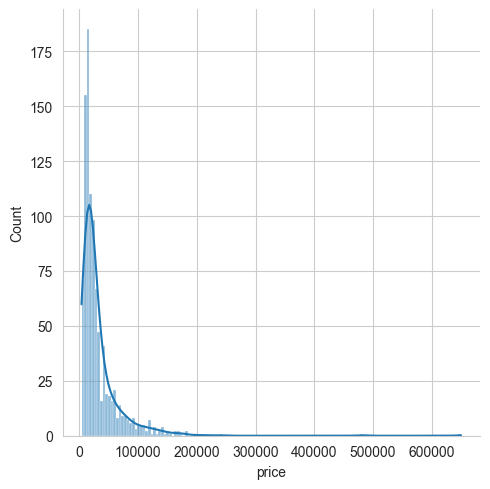

In [261]:
sns.displot(data=df, x='price', kind='hist', kde=True)

In [262]:
df.price.isnull().sum()

0

### Rating

#### Numerical

**Conclusion**

- dist is near to normal 
- there are no outliers
- 101 missing values


In [263]:
df.rating.describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

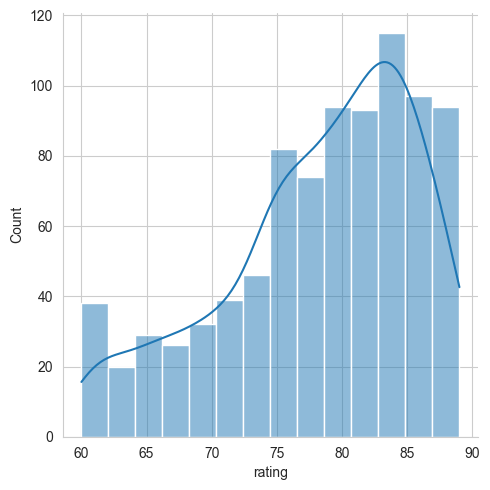

In [264]:
sns.displot(data=df, x='rating', kind='hist', kde=True)

In [265]:
df.rating.skew() # closer to 0, that means it is close to a normal curve, bit skewed towards 80  

-0.6989993034105535

<Axes: >

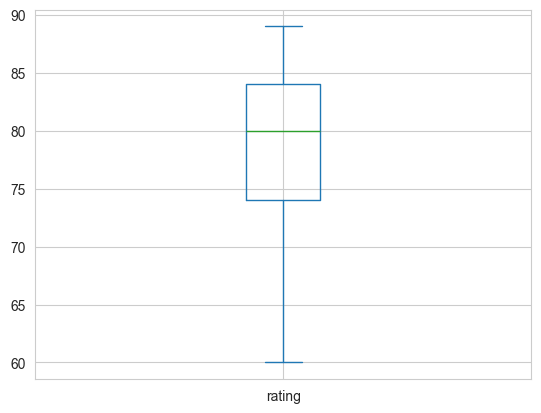

In [266]:
df.rating.plot(kind='box') # no outlier, median is around 80

In [267]:
df.rating.isnull().sum() # so many missing values in this column,😭

101

### has_5g

#### Categorical

**Conclusion**

- around 50 % phones have 5g and it affects price of the phone


In [268]:
df.has_5g.value_counts()

has_5g
True     549
False    431
Name: count, dtype: int64

<Axes: ylabel='count'>

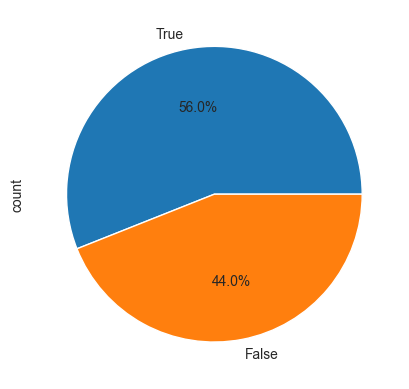

In [269]:
df.has_5g.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [270]:
df[df.has_5g == True]['price'].mean() 

43200.48816029144

In [271]:
df[df.has_5g == False]['price'].mean() # Those phones with 5g, their prices are sinifically high as compare to those that doesn't have 5g

18916.533642691415

<Axes: xlabel='has_5g'>

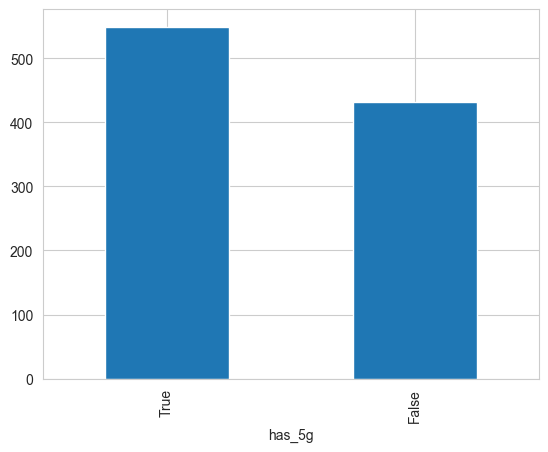

In [272]:
df.has_5g.value_counts().plot(kind='bar')

### has_nfc

#### Categorical

**Conclusion**

- most phones do not have NFC either because it was not a popular feature and it increased the price

In [273]:
df.has_NFC.value_counts()

has_NFC
False    587
True     393
Name: count, dtype: int64

<Axes: ylabel='count'>

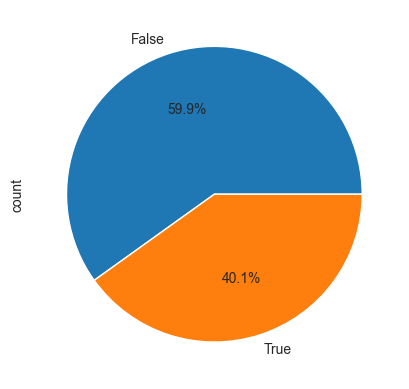

In [274]:
df.has_NFC.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [275]:
df.has_NFC.isnull().sum()

0

### has_ir_blaster

#### Categorical

**Conclusion**

- most phones with IR blaster are of chinese brands

In [276]:
df.has_IR_Blaster.value_counts()

has_IR_Blaster
False    821
True     159
Name: count, dtype: int64

<Axes: ylabel='count'>

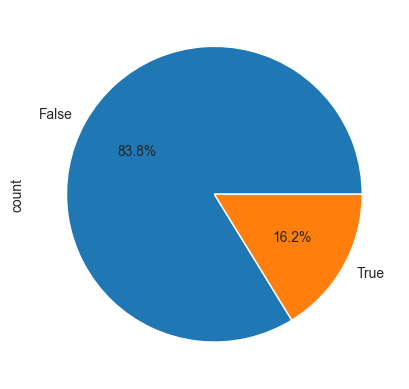

In [277]:
df.has_IR_Blaster.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [278]:
df[df.has_IR_Blaster == True].brand.value_counts() 

brand
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

In [279]:
df.has_IR_Blaster.isnull().sum()

0

### Processor Brand

#### Categorical

**Conclusion**

- there are 23 missing values

In [280]:
df.processor_brand.value_counts()

processor_brand
qualcomm      413
mediatek      378
samsung        50
unisoc         50
apple          46
google          9
huawei          7
spreadtrum      4
Name: count, dtype: int64

<Axes: ylabel='count'>

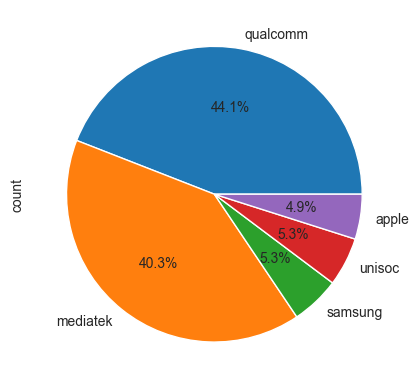

In [281]:
df.processor_brand.value_counts().head(5).plot(kind='pie',autopct='%1.1f%%') # as expected snapdragon has higher portion in the chart

In [282]:
df.processor_brand.isnull().sum()

23

### Processor core

#### Categorical

**Conclusion**

- 6 missing values
- most phones have 8 cores so this col is not contributing much, we can drop it

In [283]:
df.processor_cores.value_counts()

processor_cores
8.0    899
6.0     39
4.0     36
Name: count, dtype: int64

<Axes: ylabel='count'>

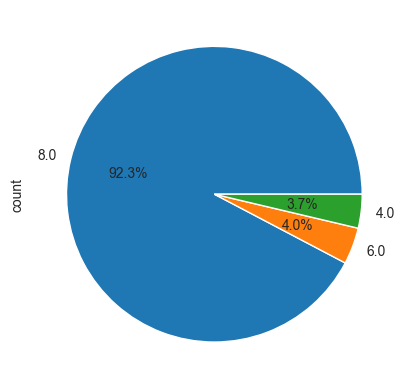

In [284]:
df.processor_cores.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [285]:
df.processor_cores.isnull().sum()

6

### Fast Charging 

#### Categorical

**Conclusion**

- most phone have fast charging
- 68 null values

In [286]:
df.fast_charging_available.value_counts()

fast_charging_available
1.0    769
0.0    143
Name: count, dtype: int64

<Axes: ylabel='count'>

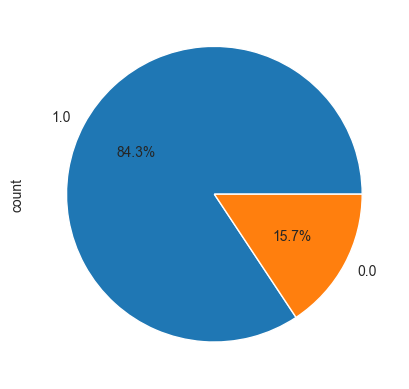

In [287]:
df.fast_charging_available.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [288]:
df.fast_charging_available.isnull().sum()

68

### Refresh rate

#### Categorical

**Conclusion**

- somephones having refresh rate above 144?
- 368 null values

In [289]:
df.refresh_rate.value_counts()

refresh_rate
120.0    344
90.0     219
144.0     39
165.0      9
240.0      1
Name: count, dtype: int64

<Axes: ylabel='count'>

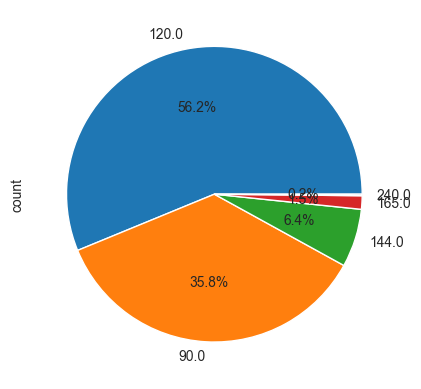

In [290]:
df.refresh_rate.value_counts().plot(kind='pie',autopct='%1.1f%%') 

In [291]:
df.refresh_rate.isnull().sum()

368

### Ram

#### Categorical

**Conclusion**

- there are some phones with 18 and 3 gb rams, bit unusual, 18 gb could be in gaming phones

In [292]:
df.ram_size.value_counts()

ram_size
8     339
6     234
4     217
12     86
3      54
2      32
16      9
1       7
18      2
Name: count, dtype: int64

<Axes: ylabel='count'>

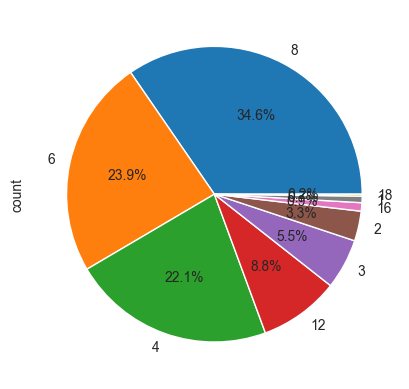

In [293]:
df.ram_size.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [294]:
df.ram_size.isnull().sum()

0

### Storage

#### Categorical

**Conclusion**

- mostly phones has 128 gb storage

In [295]:
df.storage.value_counts()

storage
128     523
64      193
256     157
32       67
512      22
16       12
1000      5
8         1
Name: count, dtype: int64

<Axes: ylabel='count'>

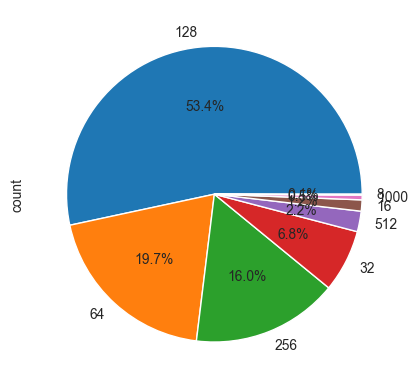

In [296]:
df.storage.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [297]:
df.storage.isnull().sum()

0

### num of cameras (fornt and back)

#### Categorical

**Conclusion**

- most phones has 552 rear cameras and 1 front camera

In [298]:
df.num_rear_cameras.value_counts()

num_rear_cameras
3    552
2    207
4    156
1     65
Name: count, dtype: int64

In [299]:
df.num_rear_cameras.isnull().sum()

0

In [300]:
df.num_front_cameras.value_counts()

num_front_cameras
1.0    948
2.0     29
Name: count, dtype: int64

In [301]:
df.num_front_cameras.isnull().sum()


3

<Axes: ylabel='count'>

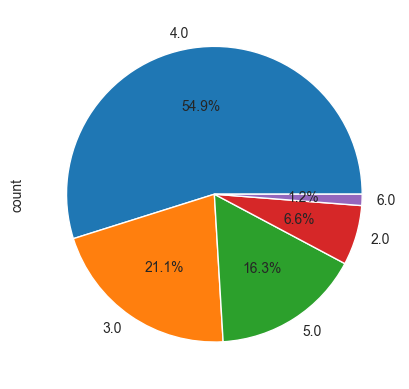

In [302]:
(df.num_front_cameras + df.num_rear_cameras).value_counts().plot(kind='pie',autopct='%1.1f%%')

### OS

#### Categorical

**Conclusion**

- 31 null values
- most phones have android so this col is not contributing much, BUT at the same time smaller amount values are of IOS which is impacting price, we will keep it, 


In [303]:
df.os.value_counts()

os
android    894
ios         46
other        9
Name: count, dtype: int64

<Axes: ylabel='count'>

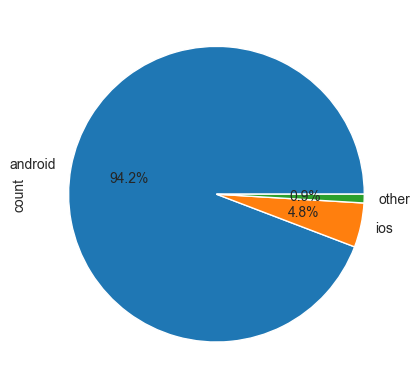

In [304]:
df.os.value_counts().plot(kind='pie',autopct='%1.1f%%') # android is dominator

In [305]:
df.os.isnull().sum()

31

### Memory card

#### Categorical

**Conclusion**

- huge number of values missing values in extended_memory_upto, 

In [306]:
df.extended_mem_availaible.value_counts()

extended_mem_availaible
1    538
0    442
Name: count, dtype: int64

<Axes: ylabel='count'>

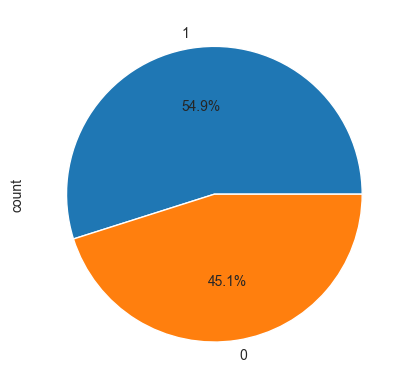

In [307]:
df.extended_mem_availaible.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [308]:
df.extended_memory_upto.value_counts()

extended_memory_upto
1000.0    263
512.0     116
256.0     104
128.0      10
2000.0      8
32.0        3
64.0        3
Name: count, dtype: int64

<Axes: ylabel='count'>

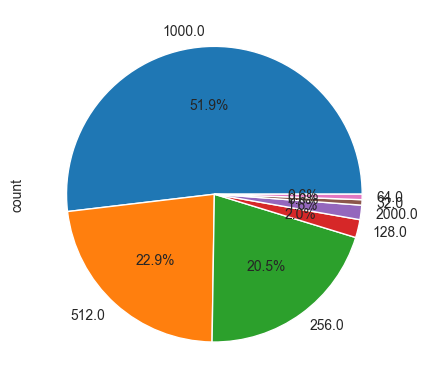

In [309]:
df.extended_memory_upto.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [310]:
df.extended_mem_availaible.isnull().sum()

0

In [311]:
df.extended_memory_upto.isnull().sum()

473

## Bivariate Analysis


### Brand name vs price

#### Categorical vs Numerical

**Conclusion**

- To reduce complexity we will consider top 10 brands
- iqoo and nubia brand are not well known but their avg price are high

In [312]:
df.brand.value_counts() #there are so many brands, we will select top 10

brand
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

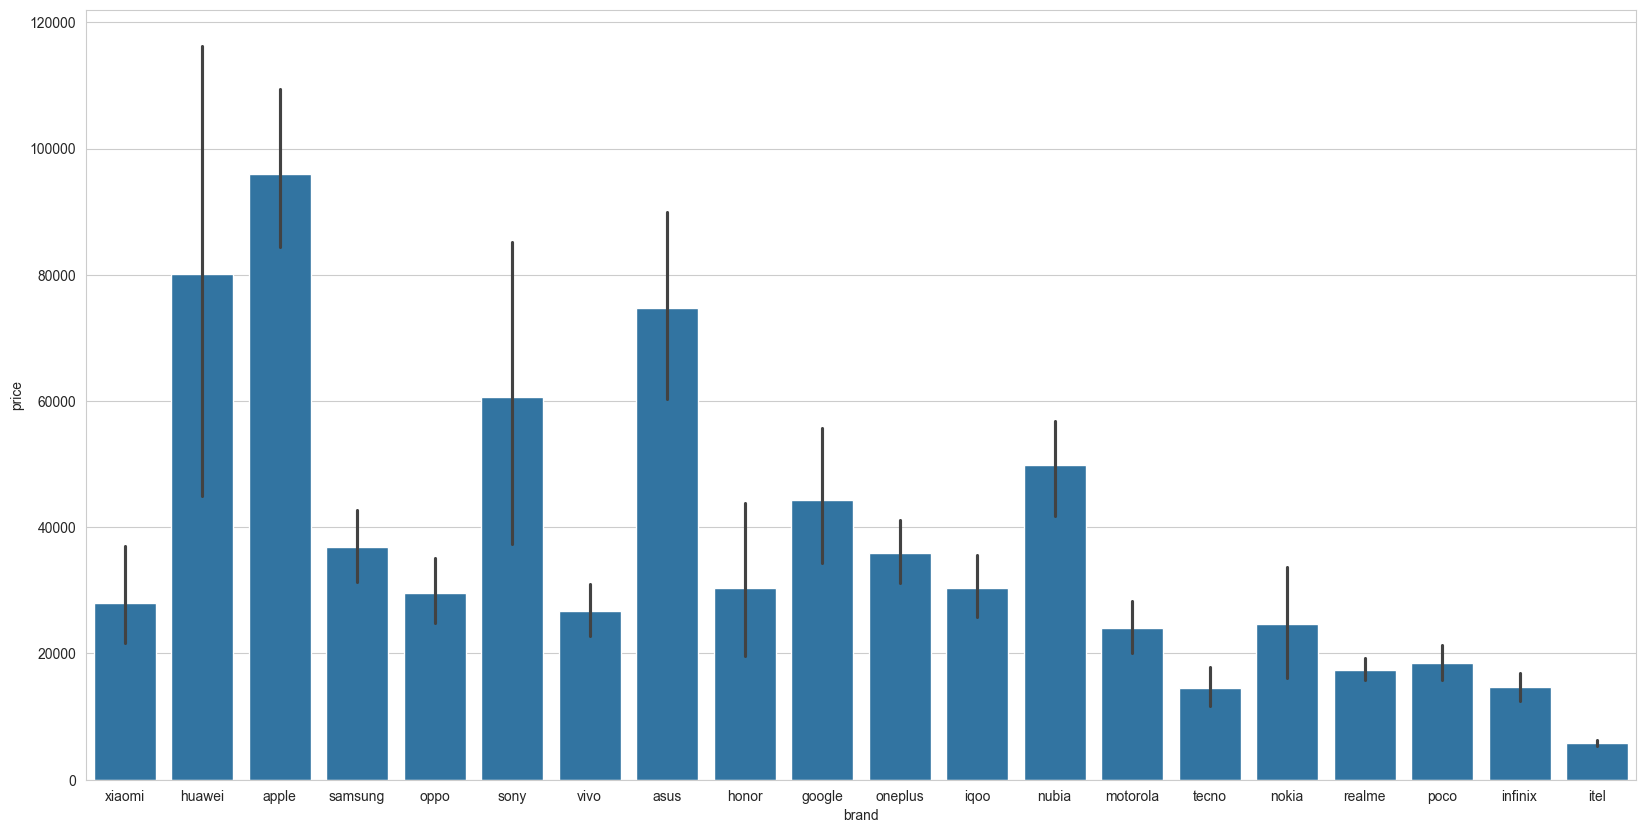

In [313]:
top = df.groupby('brand').size().reset_index(name='counts').nlargest(20, 'counts').brand

top_brands = df[df.brand.isin(top)].sort_values('price' , ascending = False)
plt.figure(figsize = (20, 10))
sns.barplot(data = top_brands,  x = 'brand', y = 'price')
plt.show()

In [314]:
df.columns

Index(['index', 'brand', 'model', 'rating', 'has_5g', 'has_NFC',
       'has_IR_Blaster', 'processor_brand', 'processor_name',
       'processor_cores', 'processor_speed', 'processor_speed_cat', 'ram_size',
       'storage', 'battery_capacity', 'fast_charging_available',
       'fast_charge_cap', 'display_size', 'dim_1', 'dim_2', 'refresh_rate',
       'total_pixels', 'resolution', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front', 'os',
       'extended_mem_availaible', 'extended_memory_upto', 'price'],
      dtype='object')

<Axes: ylabel='count'>

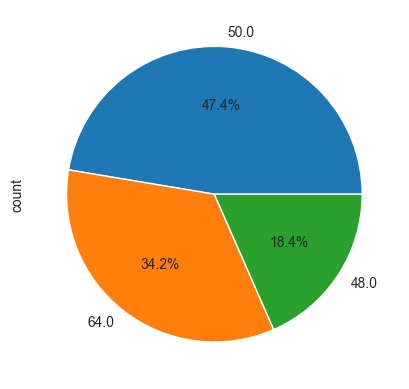

In [315]:
df[(df.brand == 'iqoo') | (df.brand == 'nubia')].primary_camera_rear.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

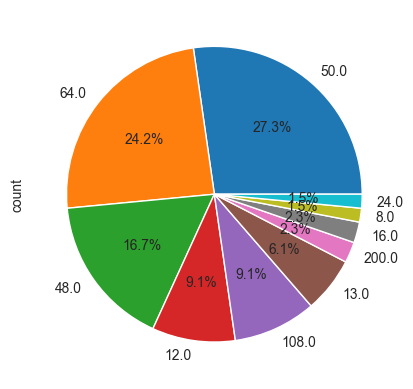

In [316]:
df[(df.brand == 'samsung')].primary_camera_rear.value_counts().plot(kind='pie',autopct='%1.1f%%')

### Rating vs price

#### Numerical vs Numerical

**Conclusion**

- rating and price are not linearly dependent
- 

<Axes: xlabel='rating', ylabel='price'>

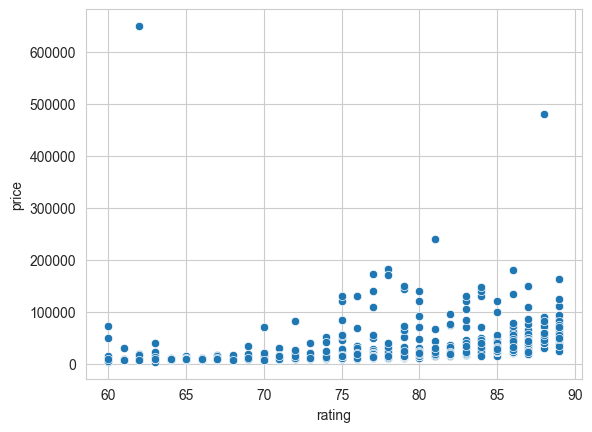

In [317]:

sns.scatterplot(x='rating', y='price', data=df) 

<Axes: xlabel='rating', ylabel='price'>

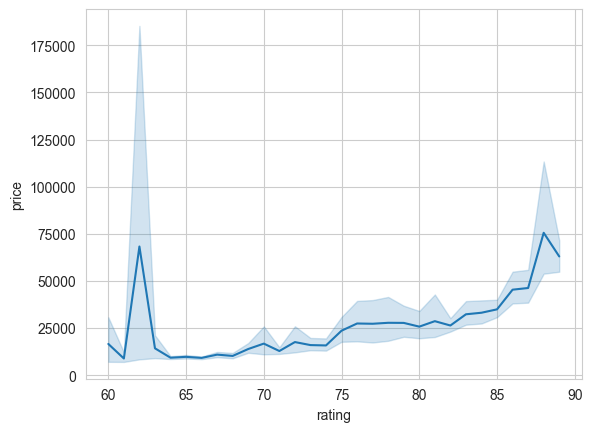

In [318]:
sns.lineplot(x='rating', y='price', data=df)  # there is very minute linear rel between both

### has_5g  vs price

#### Categorical vs Numerical

**Conclusion**

- Phone priced at around 20 to 35 have 5g, and this price is some what similar to those which doesnot have 5g, may be chinese brands offere 5g at this price

<Axes: xlabel='has_5g', ylabel='price'>

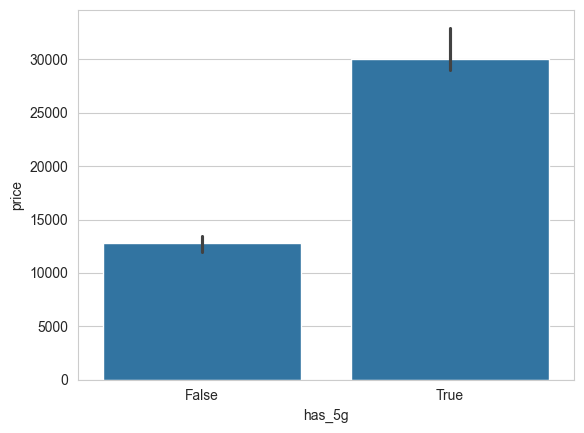

In [319]:
sns.barplot(x='has_5g', y='price', data=df, estimator='median') #  median is robust to outliers

<Axes: xlabel='price', ylabel='Density'>

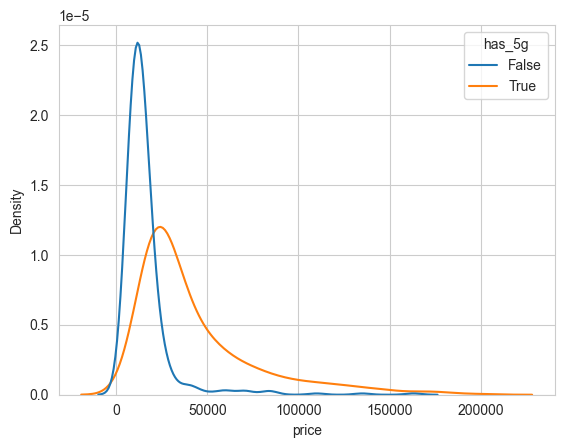

In [320]:
sns.kdeplot(data=df[df.price < 200000], x='price', hue='has_5g', )

<Axes: ylabel='count'>

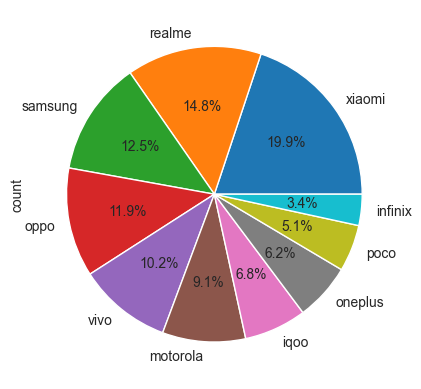

In [321]:
df[(df.price >= 15000) & (df.price <= 27000) & (df.has_5g == True)].brand.value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

### has_nfc  vs price

#### Categorical vs Numerical

**Conclusion**

- nfc is affecting
- phones priced at 30 to 40 are offering nfc
- at price 20 to 40 we can see nfc and non nfc phones according to kde plot
- top 3 brands providing nfc are samsung, apple and xiomi
- avg nfc phone are priced at 43k and non NFC 15k

<Axes: xlabel='has_NFC', ylabel='price'>

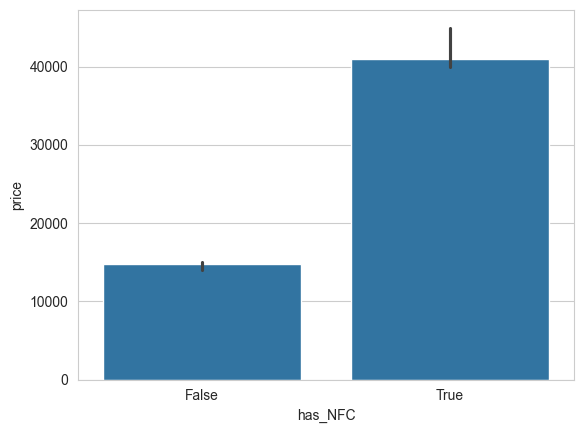

In [322]:
sns.barplot(x='has_NFC', y='price', data=df, estimator='median') # cuz is me outliers hain to median is robust

<Axes: xlabel='has_NFC', ylabel='price'>

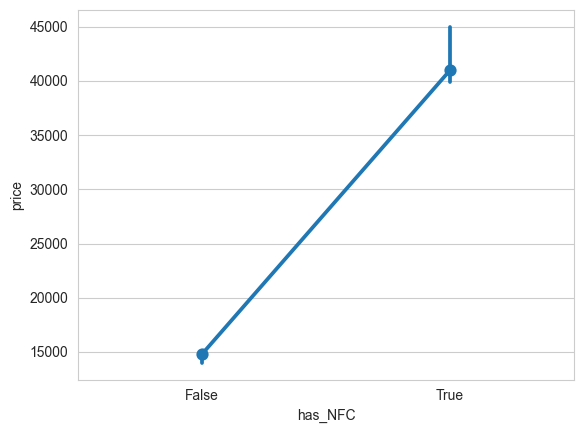

In [323]:
sns.pointplot(x='has_NFC', y='price', data=df, estimator='median')

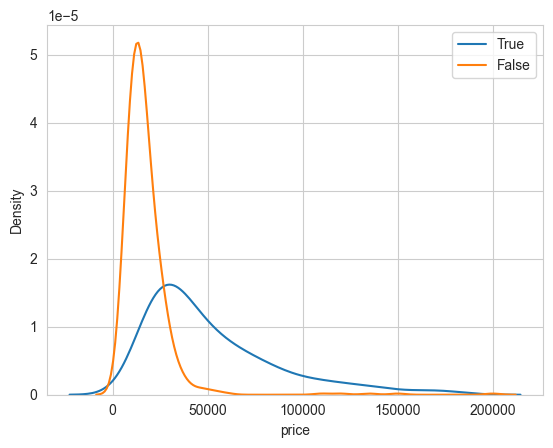

In [324]:
sns.kdeplot(data=df[(df.price < 200000) & (df.has_NFC == True)], x='price')
sns.kdeplot(data=df[(df.price < 200000) & (df.has_NFC == False)], x='price')
plt.legend(['True', 'False'])

<Axes: ylabel='count'>

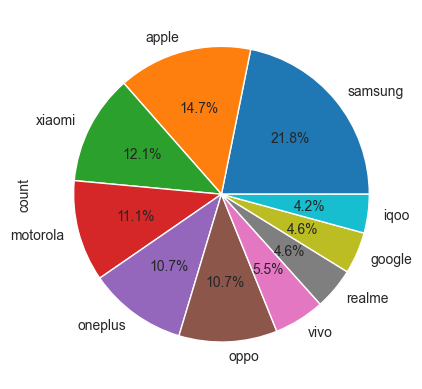

In [325]:
df[(df.has_NFC == True)].brand.value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [326]:
df[(df.brand == 'samsung') & (df.has_NFC == True)].price.describe()

count        67.000000
mean      55347.895522
std       35504.077973
min       10999.000000
25%       26749.000000
50%       42999.000000
75%       83995.000000
max      163980.000000
Name: price, dtype: float64

<Axes: ylabel='count'>

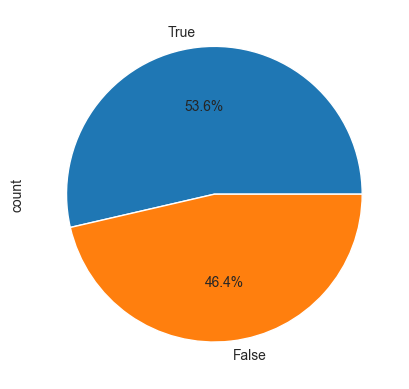

In [327]:
df[(df.price >= 20000) & (df.price < 40000)].has_NFC.value_counts().plot(kind='pie',autopct='%1.1f%%')

### has_ir_blaster  vs price

#### Categorical vs Numerical

**Conclusion**

- IR or no IR avg price is same
- Xiomi and poco2 are major phone brands which offers IR blaster 

<Axes: xlabel='has_IR_Blaster', ylabel='price'>

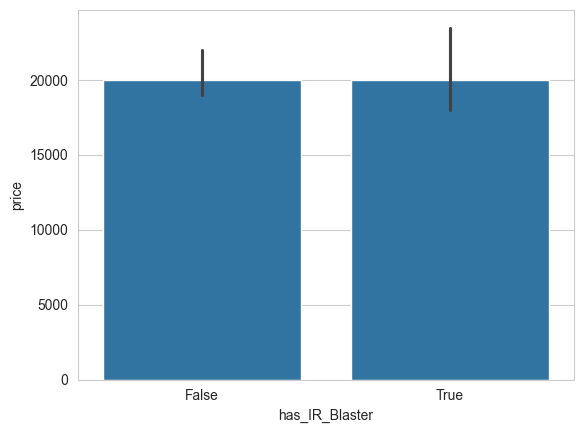

In [328]:
sns.barplot(x='has_IR_Blaster', y='price', data=df, estimator='median')

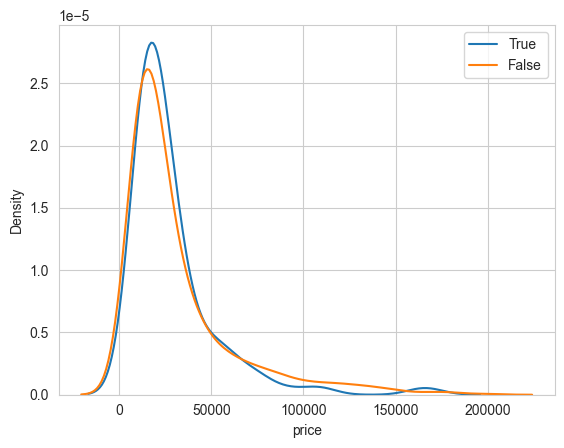

In [329]:
sns.kdeplot(data=df[(df.price < 200000)& (df.has_IR_Blaster ==True)], x='price' )
sns.kdeplot(data=df[(df.price < 200000)& (df.has_IR_Blaster ==False)], x='price' )
plt.legend(['True', 'False'])

# mid range phone priced at 30-40k having IR blaster are slightly more expensive than the one which are not, but flagship cateory phones do not have IR blaster and they are still expensive

<Axes: ylabel='count'>

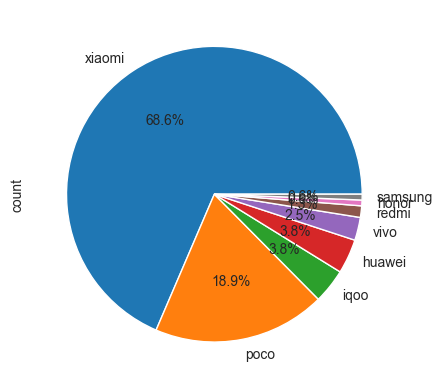

In [330]:
df[(df.has_IR_Blaster == True)].brand.value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [331]:


sns.set_style('whitegrid')

### processor_name  vs price

#### Categorical vs Numerical

**Conclusion**

- mostly phones have qualcomm processors, but they have low median price as compare to other processor like apple phone's processor, because qualcomm is used in most of the android phones so median is affected, 
- same with mediatek

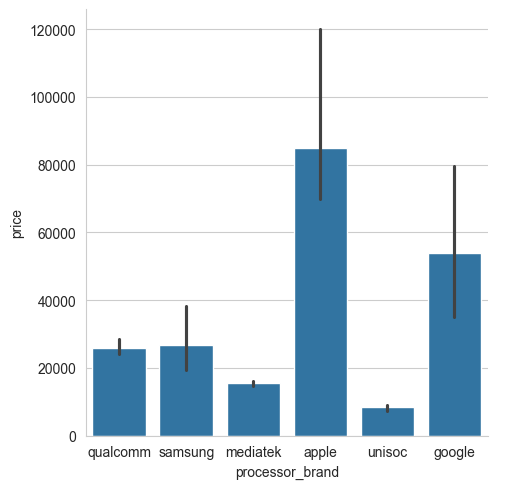

In [332]:
temp_df =df[(df.processor_brand.isin(df.processor_brand.value_counts().head(6).index)) & (df.price < 200000)]
sns.catplot(x='processor_brand', y='price', data=temp_df, estimator='median', kind='bar') 

<Axes: ylabel='count'>

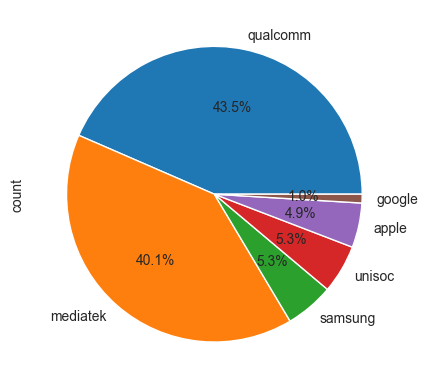

In [333]:
temp_df.processor_brand.value_counts().plot(kind='pie',autopct='%1.1f%%') 

In [334]:
df.columns

Index(['index', 'brand', 'model', 'rating', 'has_5g', 'has_NFC',
       'has_IR_Blaster', 'processor_brand', 'processor_name',
       'processor_cores', 'processor_speed', 'processor_speed_cat', 'ram_size',
       'storage', 'battery_capacity', 'fast_charging_available',
       'fast_charge_cap', 'display_size', 'dim_1', 'dim_2', 'refresh_rate',
       'total_pixels', 'resolution', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front', 'os',
       'extended_mem_availaible', 'extended_memory_upto', 'price'],
      dtype='object')

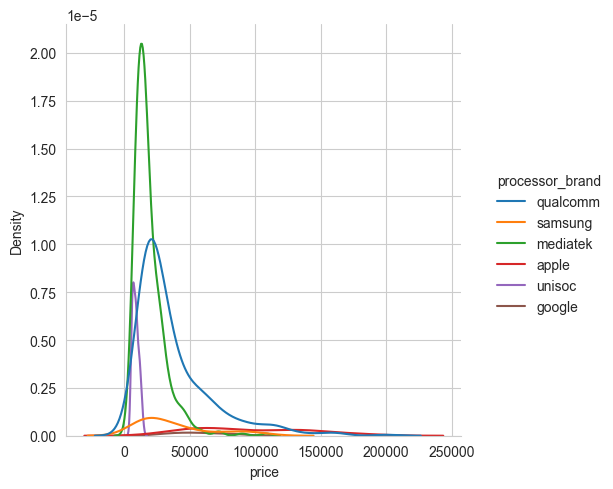

In [335]:
sns.displot(x='price', data=temp_df,kind= 'kde', hue='processor_brand') 

### processor_cores  vs price

#### Categorical vs Numerical

**Conclusion**

- processor having 6.0 core are of apple's

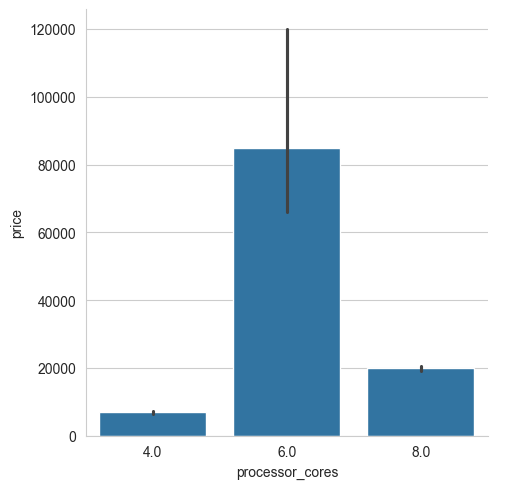

In [336]:
temp_df =df[(df.price < 200000)]
sns.catplot(x='processor_cores', y='price', data=temp_df, estimator='median', kind='bar') # why are 6.0 cores processor phone price is higher than 8.0

<Axes: ylabel='count'>

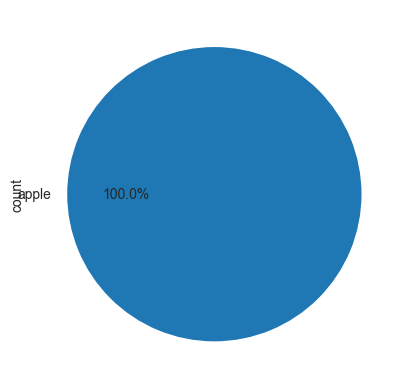

In [337]:
temp_df[temp_df.processor_cores == 6.0].processor_brand.value_counts().plot(kind='pie',autopct='%1.1f%%')# OOO😱 thats why, 100% of the phones are of apple thats having 6.0 core processor 

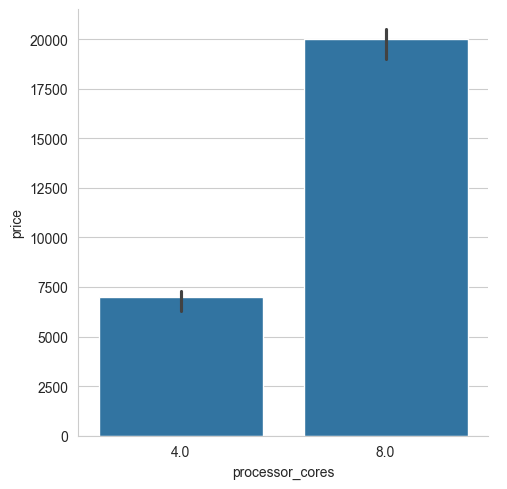

In [338]:
# lets remove phones having 6.0 cores processor and check now
temp_df1 =df[(df.price < 200000) & (df.processor_cores !=6.0)]
sns.catplot(x='processor_cores', y='price', data=temp_df1, estimator='median', kind='bar') # as expcted 8.0 are high in price

In [339]:
pd.crosstab(df['processor_cores'], df['os']) 

os,android,ios,other
processor_cores,,,
4.0,34,1,1
6.0,0,39,0
8.0,859,1,8


### processor_speed  vs price

#### Categorical vs Numerical

**Conclusion**

- price rangess, low category phones have 25k as highest price, mid range has 60 and high has 2 lacs
- price is dep on how much the speed is (bar chart)
- qualcom processor is used in most of the high range phone
- following are famouse processor speeds of each category
-   low : 1.2 1.6 1.8

    mid : 2.0 2.2 2.4
    
    high: 2.8, 3.0, 3.2

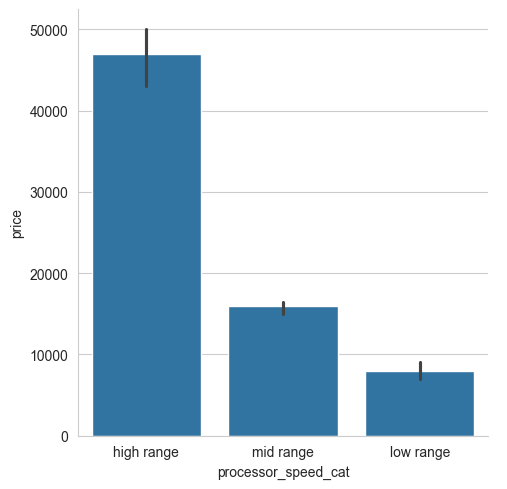

In [342]:
sns.catplot(x='processor_speed_cat', y='price', data=temp_df, estimator='median', kind='bar') 

<Axes: ylabel='count'>

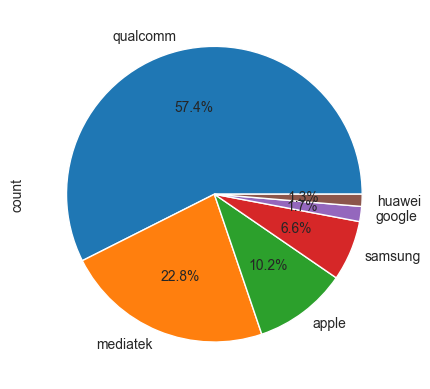

In [345]:
temp_df[temp_df.processor_speed_cat == 'high range'].processor_brand.value_counts().plot(kind='pie',autopct='%1.1f%%') # as expected high range processor phone aapple qualcom mediatek

<Axes: xlabel='price', ylabel='Density'>

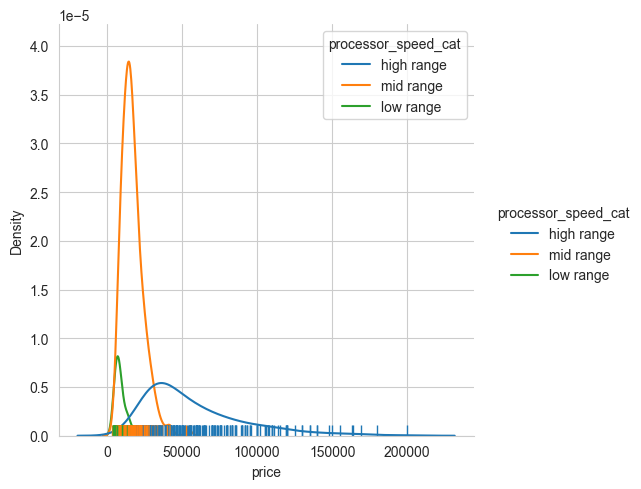

In [356]:
sns.displot(data= temp_df, x='price', hue='processor_speed_cat',kind= 'kde')
sns.rugplot(data= temp_df, x='price', hue='processor_speed_cat')  


<Axes: xlabel='price', ylabel='Count'>

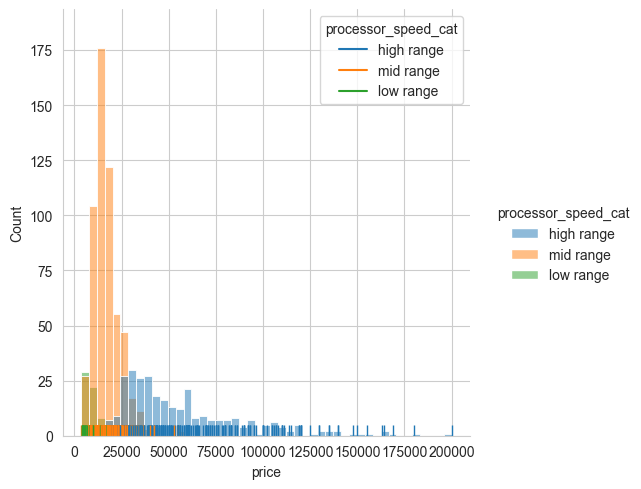

In [357]:
sns.displot(data= temp_df, x='price', hue='processor_speed_cat',kind= 'hist')
sns.rugplot(data= temp_df, x='price', hue='processor_speed_cat')


<Axes: xlabel='processor_speed', ylabel='Density'>

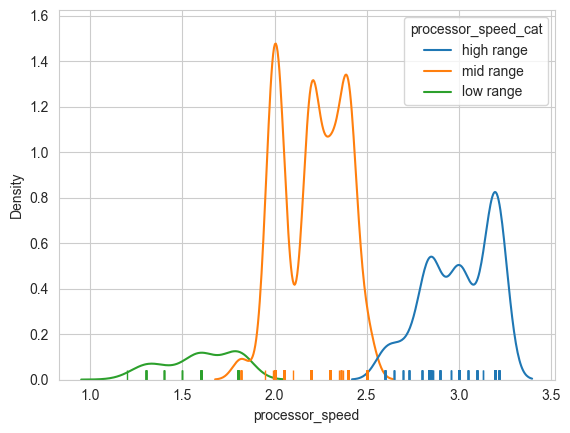

In [374]:
sns.kdeplot(data= temp_df, hue='processor_speed_cat', x='processor_speed',)# this shows that which processor speed is mostly used in each categories
sns.rugplot(data= temp_df, hue='processor_speed_cat', x='processor_speed')



<Axes: xlabel='price', ylabel='processor_speed_cat'>

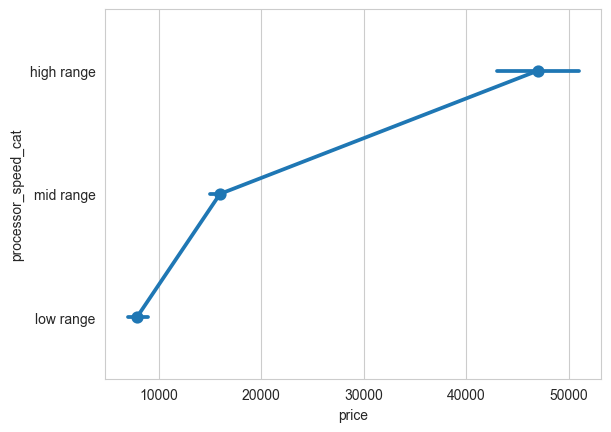

In [362]:
sns.pointplot(data= temp_df, x='price', y='processor_speed_cat' ,estimator='median') 

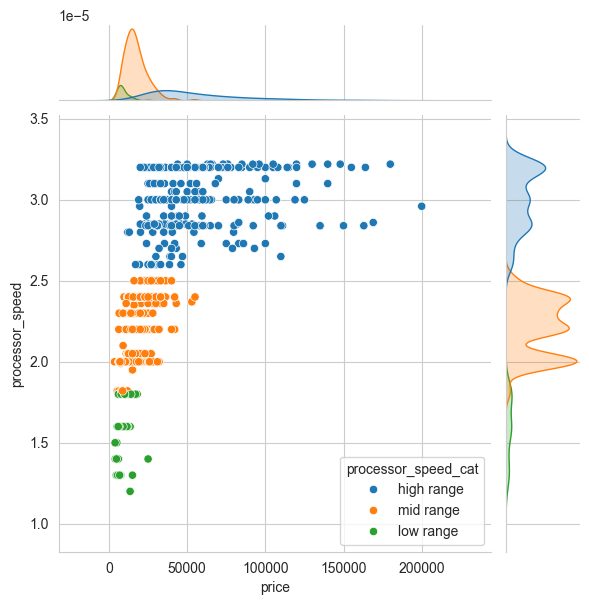

In [369]:
sns.jointplot(data= temp_df, x='price', y='processor_speed' ,kind='scatter', hue='processor_speed_cat')  

<Axes: xlabel='price', ylabel='processor_speed'>

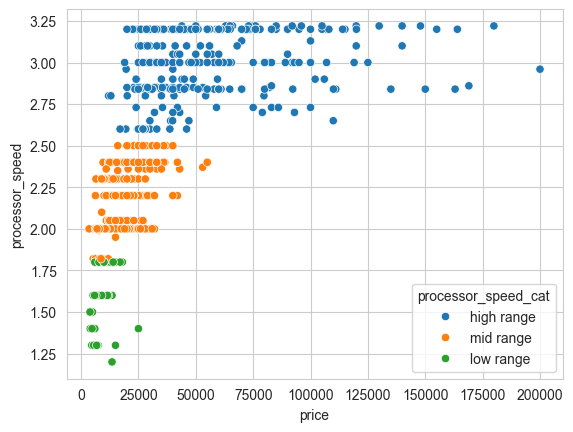

In [370]:
sns.scatterplot(data= temp_df, x='price', y='processor_speed' ,hue='processor_speed_cat') # This shows two things: first, which category belongs to which speed range, and second, the price ranges. In the starting range, there isn't much of a difference between the three categories, but towards the end, the low category ends at 25, the mid category at 60k, and the high category at 2 lakhs.

## Future tasks

In [377]:
df.select_dtypes(include=['int64', 'float64']).corr()['price'] # Thia ia the correlation of price with other column chose high correlation columns to perform bivariate analysis

index                      0.020743
rating                     0.283504
processor_cores           -0.048561
processor_speed            0.474049
ram_size                   0.386002
storage                    0.558420
battery_capacity          -0.159232
fast_charging_available    0.099979
fast_charge_cap            0.237041
display_size               0.113253
dim_1                      0.340592
dim_2                      0.353578
refresh_rate               0.391679
total_pixels               0.471767
num_rear_cameras           0.127643
num_front_cameras          0.114736
primary_camera_rear        0.092827
primary_camera_front       0.165009
extended_mem_availaible   -0.338584
extended_memory_upto       0.047772
price                      1.000000
Name: price, dtype: float64

<Axes: >

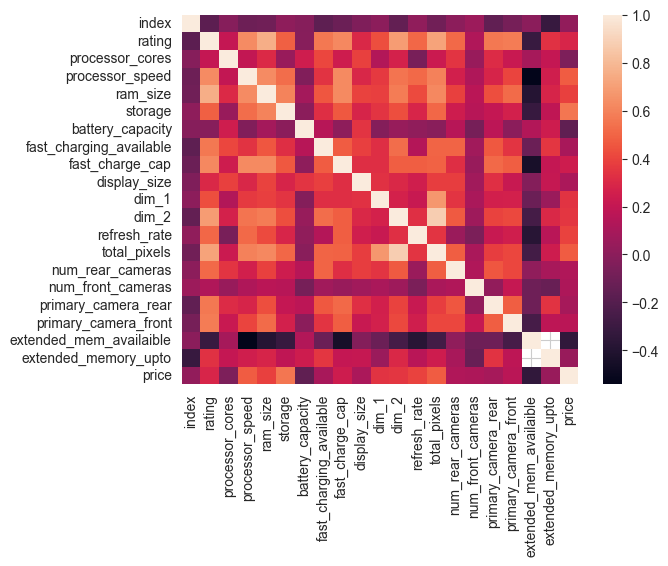

In [378]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr()) #this heatmap can be ussed to perform multivatiate analysus 

### Imputing missing values in Rating using KNN IMPUTER

In [382]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price') # price wala isliye drop kara cuz wo target col hai, still confused
x_df_values = imputer.fit_transform(x_df)
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)
x_df['price'] = df['price']
x_df.head() 

,index,rating,processor_cores,processor_speed,ram_size,storage,battery_capacity,fast_charging_available,fast_charge_cap,display_size,dim_1,dim_2,refresh_rate,total_pixels,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_mem_availaible,extended_memory_upto,price
0,2.0,89.0,8.0,3.2,12.0,256.0,5000.0,1.0,100.0,6.70,1440.0,3216.0,120.0,4631040.0,3.0,1.0,50.0,16.0,0.0,1000.0,54999.0
1,3.0,81.0,8.0,2.2,6.0,128.0,5000.0,1.0,33.0,6.59,1080.0,2412.0,120.0,2604960.0,3.0,1.0,64.0,16.0,1.0,1000.0,19989.0
2,4.0,75.0,8.0,2.4,4.0,64.0,5000.0,1.0,15.0,6.60,1080.0,2408.0,90.0,2600640.0,3.0,1.0,50.0,13.0,1.0,1000.0,16499.0
3,5.0,81.0,8.0,2.2,6.0,128.0,5000.0,1.0,56.6,6.55,1080.0,2400.0,120.0,2592000.0,3.0,1.0,50.0,16.0,1.0,1000.0,14999.0
4,6.0,82.0,8.0,2.6,6.0,128.0,5000.0,1.0,67.0,6.70,1080.0,2412.0,120.0,2604960.0,3.0,1.0,108.0,16.0,0.0,1000.0,24999.0


In [384]:
a = x_df.corr()['price'].reset_index()
b = df.select_dtypes(include=['int64','float64']).corr()['price'].reset_index()
b.merge(a,on='index') # rating and price correlation may increase after filling missing values

,index,price_x,price_y
0,index,0.020743,0.020743
1,rating,0.283504,0.348517
2,processor_cores,-0.048561,-0.063239
3,processor_speed,0.474049,0.502102
4,ram_size,0.386002,0.386002
5,storage,0.558420,0.558420
6,battery_capacity,-0.159232,-0.171920
7,fast_charging_available,0.099979,0.049234
8,fast_charge_cap,0.237041,0.227622
9,display_size,0.113253,0.113253


In [386]:
df.columns

Index(['index', 'brand', 'model', 'rating', 'has_5g', 'has_NFC',
       'has_IR_Blaster', 'processor_brand', 'processor_name',
       'processor_cores', 'processor_speed', 'processor_speed_cat', 'ram_size',
       'storage', 'battery_capacity', 'fast_charging_available',
       'fast_charge_cap', 'display_size', 'dim_1', 'dim_2', 'refresh_rate',
       'total_pixels', 'resolution', 'num_rear_cameras', 'num_front_cameras',
       'primary_camera_rear', 'primary_camera_front', 'os',
       'extended_mem_availaible', 'extended_memory_upto', 'price'],
      dtype='object')

In [393]:
pd.get_dummies(df,columns=['brand','processor_brand','os'],drop_first=True, dtype='float64').select_dtypes(include=['int64','float64']).corr()['price'].reset_index() #By one-hot encoding, we can also see the correlation of categorical variables, like how **OS_cat** has a strong positive correlation with price.

,index,price
0,index,0.020743
1,rating,0.283504
2,processor_cores,-0.048561
3,processor_speed,0.474049
4,ram_size,0.386002
...,...,...
70,processor_brand_samsung,0.031226
71,processor_brand_spreadtrum,-0.043668
72,processor_brand_unisoc,-0.140459
73,os_ios,0.356357
